# 과자 예시

## 컨텐츠 기반 필터링

In [1]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Define the matrix
matrix = np.array([[1, 1, 1, 0],
                   [1, 0, 1, 1],
                   [1, 0, 0, 1],
                   [0, 1, 1, 0]])

# Calculate cosine similarity
similarity_matrix = cosine_similarity(matrix)

# Print the similarity matrix
print(similarity_matrix)

[[1.         0.66666667 0.40824829 0.81649658]
 [0.66666667 1.         0.81649658 0.40824829]
 [0.40824829 0.81649658 1.         0.        ]
 [0.81649658 0.40824829 0.         1.        ]]


## Bag of Words 예제

In [2]:
import pandas as pd
from collections import Counter

documents = [
    "I love watching movies",
    "I enjoy reading books",
    "I love reading and watching movies"
]

# Preprocess sentences: lower case and tokenize
tokenized_documents = [doc.lower().split() for doc in documents]
print(tokenized_documents)

print('\n')
# Calculate word frequencies for each document
word_frequencies = [Counter(doc) for doc in tokenized_documents]
print(word_frequencies)

print('\n')
# Create a DataFrame to display the results
bow_df = pd.DataFrame(word_frequencies, index=["Document 1", "Document 2", "Document 3"]).fillna(0)
print("Bag of Words representation:")
display(bow_df)


[['i', 'love', 'watching', 'movies'], ['i', 'enjoy', 'reading', 'books'], ['i', 'love', 'reading', 'and', 'watching', 'movies']]


[Counter({'i': 1, 'love': 1, 'watching': 1, 'movies': 1}), Counter({'i': 1, 'enjoy': 1, 'reading': 1, 'books': 1}), Counter({'i': 1, 'love': 1, 'reading': 1, 'and': 1, 'watching': 1, 'movies': 1})]


Bag of Words representation:


,i,love,watching,movies,enjoy,reading,books,and
Document 1,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0
Document 2,1,0.0,0.0,0.0,1.0,1.0,1.0,0.0
Document 3,1,1.0,1.0,1.0,0.0,1.0,0.0,1.0


## TF-IDF 예제

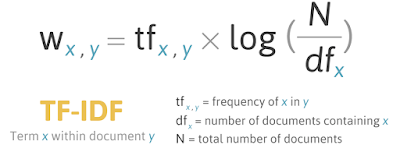

In [3]:
import pandas as pd
import numpy as np
from collections import Counter
import math

# Sample sentences
documents = [
    "I love watching movies",
    "I enjoy reading books",
    "I love reading and watching movies"
]

# Preprocess sentences: lower case and tokenize
tokenized_documents = [doc.lower().split() for doc in documents]
print("Tokenized Documents:")
print(tokenized_documents)

Tokenized Documents:
[['i', 'love', 'watching', 'movies'], ['i', 'enjoy', 'reading', 'books'], ['i', 'love', 'reading', 'and', 'watching', 'movies']]


In [4]:
# Calculate term frequency
def term_frequency(doc):

    term_count = Counter(doc)
    # Counter({'i': 1, 'love': 1, 'watching': 1, 'movies': 1})

    total_terms = len(doc)
    return {term: count / total_terms for term, count in term_count.items()}

In [5]:
tf_values = [term_frequency(doc) for doc in tokenized_documents]

print(tf_values)
print('\n')

tf_df = pd.DataFrame(tf_values, index=["Document 1", "Document 2", "Document 3"]).fillna(0)
print("\nTerm Frequencies DataFrame:")
display(tf_df)

[{'i': 0.25, 'love': 0.25, 'watching': 0.25, 'movies': 0.25}, {'i': 0.25, 'enjoy': 0.25, 'reading': 0.25, 'books': 0.25}, {'i': 0.16666666666666666, 'love': 0.16666666666666666, 'reading': 0.16666666666666666, 'and': 0.16666666666666666, 'watching': 0.16666666666666666, 'movies': 0.16666666666666666}]



Term Frequencies DataFrame:


,i,love,watching,movies,enjoy,reading,books,and
Document 1,0.250000,0.250000,0.250000,0.250000,0.00,0.000000,0.00,0.000000
Document 2,0.250000,0.000000,0.000000,0.000000,0.25,0.250000,0.25,0.000000
Document 3,0.166667,0.166667,0.166667,0.166667,0.00,0.166667,0.00,0.166667


In [6]:
# Calculate inverse document frequency
def inverse_document_frequency(docs):
    total_docs = len(docs)

    # {'movies', 'enjoy', 'i', 'and', 'love', 'reading', 'watching', 'books'}
    unique_terms = set(term for doc in docs for term in doc)

    # {'movies': 2, 'enjoy': 1, 'i': 3, 'and': 1, 'love': 2, 'reading': 2, 'watching': 2, 'books': 1}
    term_doc_counts = {term: sum(1 for doc in docs if term in doc) for term in unique_terms}

    return {term: math.log(total_docs / count) for term, count in term_doc_counts.items()}

In [7]:
idf_values = inverse_document_frequency(tokenized_documents)
idf_df = pd.DataFrame([idf_values], index=["IDF"]).fillna(0)
print("\nInverse Document Frequencies DataFrame:")
display(idf_df)


Inverse Document Frequencies DataFrame:


,enjoy,love,watching,and,reading,books,movies,i
IDF,1.098612,0.405465,0.405465,1.098612,0.405465,1.098612,0.405465,0.0


In [8]:
# Calculate TF-IDF
def tf_idf(tf, idf):
    return {term: tf_val * idf[term] for term, tf_val in tf.items()}

In [9]:
tf_idf_values = [tf_idf(tf, idf_values) for tf in tf_values]
print("\nTF-IDF Values:")
display(tf_idf_values)


TF-IDF Values:


[{'i': 0.0,
  'love': 0.1013662770270411,
  'watching': 0.1013662770270411,
  'movies': 0.1013662770270411},
 {'i': 0.0,
  'enjoy': 0.27465307216702745,
  'reading': 0.1013662770270411,
  'books': 0.27465307216702745},
 {'i': 0.0,
  'love': 0.06757751801802739,
  'reading': 0.06757751801802739,
  'and': 0.1831020481113516,
  'watching': 0.06757751801802739,
  'movies': 0.06757751801802739}]

In [10]:
# Create a DataFrame to display the results
tf_idf_df = pd.DataFrame(tf_idf_values, index=["Document 1", "Document 2", "Document 3"]).fillna(0)
print("\nTF-IDF DataFrame:")
display(tf_idf_df)


TF-IDF DataFrame:


,i,love,watching,movies,enjoy,reading,books,and
Document 1,0.0,0.101366,0.101366,0.101366,0.000000,0.000000,0.000000,0.000000
Document 2,0.0,0.000000,0.000000,0.000000,0.274653,0.101366,0.274653,0.000000
Document 3,0.0,0.067578,0.067578,0.067578,0.000000,0.067578,0.000000,0.183102
